In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Stars.csv')
print('data head:')
print(data.head(), '\n')
print('data describe:')
print(data.describe(), '\n')

data head:
   Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0 

data describe:
        Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10497.462500  107188.361635   237.157781    4.382396    2.500000
std     9552.425037  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3344.250000       0.000865     0.102750   -6.232500    1.000000
50%     5776.000000       0.070500     0.762500    8.313000    2.500000
75%    15055.500000  198050.000000    42.750000   13.697500    4.0

In [ ]:
data['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [ ]:
data['Color'] = data['Color'].replace(
    {
        "Orange-Red": "Red",
        "Pale yellow orange": "Orange",
        "Blue White": "Blue-White",
        "Blue white": "Blue-White",
        "Blue-white": "Blue-White",
        "Whitish": "White",
        "white": "White",
        "yellow-white": "White-Yellow",
        "Yellowish White": "White-Yellow",
        "yellowish": "White-Yellow",
        "Yellowish": "White-Yellow",
    }
)

In [ ]:
print(data['Color'].value_counts())
print(data['Spectral_Class'].value_counts())

Red             113
Blue             56
Blue-White       41
White-Yellow     15
White            12
Orange            3
Name: Color, dtype: int64
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64


In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(categorical_cols)
print(numeric_cols)

['Color', 'Spectral_Class']
['Temperature', 'L', 'R', 'A_M', 'Type']


In [ ]:
target_name = 'Type'
numeric_cols.remove('Type')

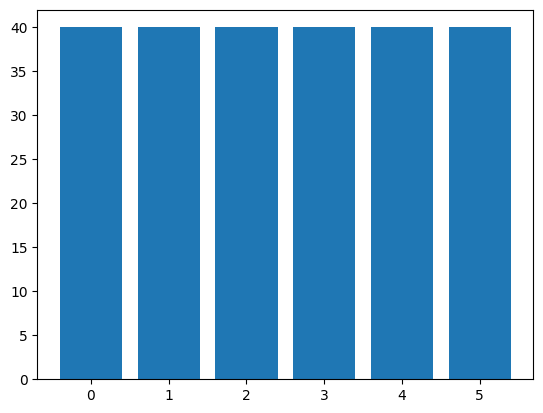

In [ ]:
plt.bar(data[target_name].unique(), data[target_name].value_counts())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_name, axis=1),
    data[target_name],
    test_size=0.3,
    random_state=1,
    shuffle=True
)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(168, 6)
(168,)

(72, 6)
(72,)


In [ ]:
X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = encoder.fit_transform(X_train[categorical_cols]).astype(int)
X_test_cat = encoder.fit_transform(X_test[categorical_cols]).astype(int)

In [ ]:
X_train = np.hstack((X_train_num_scaled, X_train_cat))
X_test = np.hstack((X_test_num_scaled, X_test_cat))
X_train.shape, X_test.shape

((168, 6), (72, 6))

# Метрики


In [ ]:
#вывести метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

In [ ]:
def metrics(y_test, y_pred):
    print(classification_report(y_test, y_pred))


    # матрица ошибок
    print('Confusion matrix')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    y_test = label_binarize(y_test, classes=[0,1,2,3,4,5])
    y_pred = label_binarize(y_pred, classes=[0,1,2,3,4,5])

    #PR-кривая и PR AUC
    n_classes = 6

    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, lw=2, label=f'Class {i} (AUC = {pr_auc:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for multi-class')
    plt.legend(loc="lower left")
    plt.show()

    # ROC-кривая и ROC AUC
    n_classes = 6

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:0.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) for multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
#обучить логистическую регрессию
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.69      1.00      0.82         9
           2       1.00      1.00      1.00        11
           3       1.00      0.67      0.80        15
           4       0.69      1.00      0.82         9
           5       1.00      0.94      0.97        18

    accuracy                           0.89        72
   macro avg       0.90      0.90      0.88        72
weighted avg       0.92      0.89      0.89        72

Confusion matrix
[[ 8  2  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  2  0 10  3  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  1 17]]


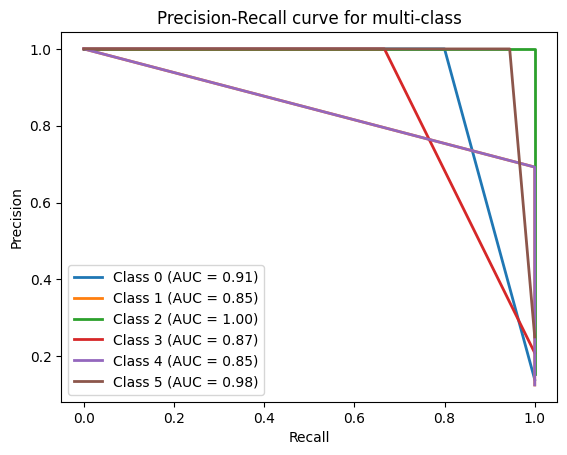

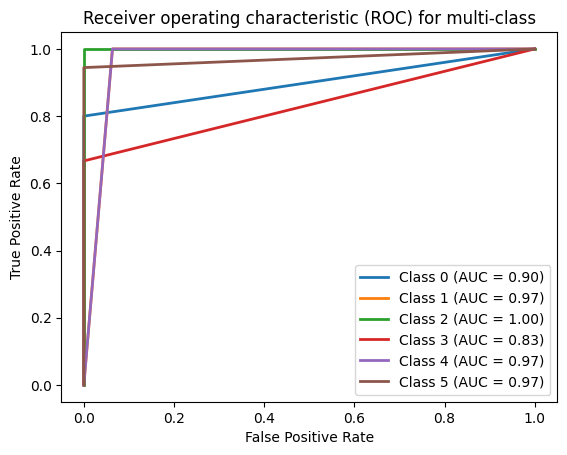

In [ ]:
metrics(y_test, y_pred)

classification_report

Support: количество наблюдений для каждого класса

Подходы к усреднению метрик

micro = accuracy (сумма верных срабатываний для всех классов, деленная на все объекты)

Macro avg: среднее арифметическое показателя между классами

weighted avg: средневзвешенное значение рассчитывается путем произведения оценки показателя каждого класса на его количество наблюдений, последующее суммирование результата и деление результата на сумму наблюдений

Зачем?

* Удобно, когда классов очень много
* micro - когда классы сбалансированы
* macro - каждому классу даем одинаковый вес, вне зависимости от дисбаланса классов, хорошо использовать, если нам важен меньший класс, например, мошеннические транзакции, которых мало, а хороших транзакций много, при плохой модели мы получим низкую macro метрику
* weighted - учитываем размер каждого класса, даем класса вес, согласно их количеству. Если меньший класс нам не важен, то мы можем им принебречь при подсчете метрики. Если macro сильно среагирует на ошибки на малом классе, то weighted нет.


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# использовать алгоритм KNN из sklearn

In [ ]:
knn = KNeighborsClassifier()
number_of_neighbors = np.arange(25) #количество соседей для перебора
#инициализировать модель

# задаем диапазон значений гиперпараметра k
param_grid = {'n_neighbors': number_of_neighbors}

# создаем объект GridSearchCV для поиска оптимального значения гиперпараметра
grid_search = GridSearchCV(knn, param_grid)


In [ ]:
grid_search.fit(X_train, y_train) #обучение модели

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])})

In [ ]:
grid_search.best_estimator_ # лучшая модель получается при k = 1

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = grid_search.predict(X_test) # результат работы модели на тесте
y_pred

array([4, 1, 2, 3, 3, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 3, 5, 0, 3, 4, 5, 5,
       4, 3, 4, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
       0, 2, 1, 2, 0, 5, 1, 0, 2, 5, 3, 2, 1, 0, 1, 1, 5, 2, 4, 5, 5, 4,
       0, 4, 4, 3, 5, 5])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       0.92      1.00      0.96        11
           3       1.00      0.93      0.97        15
           4       0.82      1.00      0.90         9
           5       1.00      0.89      0.94        18

    accuracy                           0.96        72
   macro avg       0.96      0.97      0.96        72
weighted avg       0.96      0.96      0.96        72

Confusion matrix
[[10  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  1 14  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  2 16]]


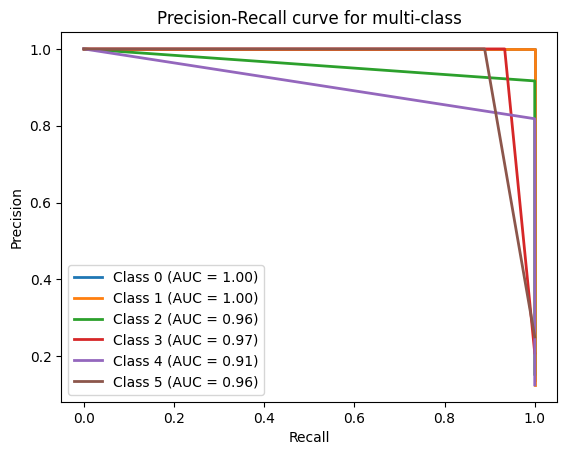

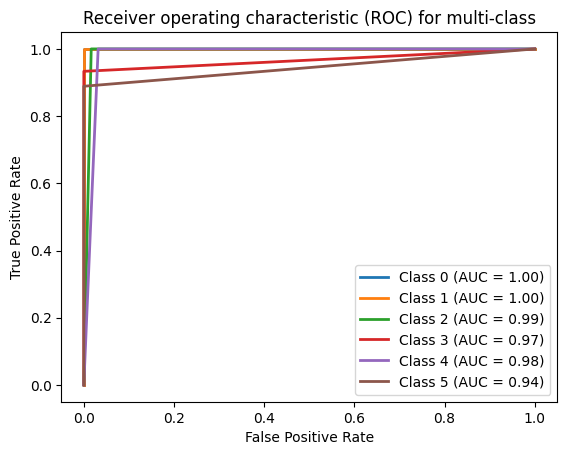

In [ ]:
metrics(y_test, y_pred)

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#использовать SVM для решения задачи классификации
param_kernel = ('linear', 'rbf', "poly", "sigmoid") # ядра

#аналогично как и для KNN, найти оптимальное ядро

In [ ]:
svm = SVC()

In [ ]:
param_grid = {'kernel': param_kernel}

In [ ]:
grid_search = GridSearchCV(svm, param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [ ]:
grid_search.best_estimator_ # оптимальное ядро linear

SVC(kernel='linear')

In [ ]:
y_pred = grid_search.predict(X_test) # результат работы модели на тесте
y_pred

array([4, 1, 2, 3, 4, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 4, 5, 0, 3, 4, 5, 5,
       4, 4, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
       0, 3, 1, 2, 0, 5, 1, 0, 2, 5, 1, 2, 1, 0, 1, 1, 5, 2, 4, 5, 5, 4,
       0, 5, 4, 4, 5, 5])

Accuracy:  0.9305555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        11
           3       1.00      0.67      0.80        15
           4       0.69      1.00      0.82         9
           5       1.00      1.00      1.00        18

    accuracy                           0.93        72
   macro avg       0.93      0.94      0.93        72
weighted avg       0.95      0.93      0.93        72

Confusion matrix
[[10  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  1  0 10  4  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 18]]


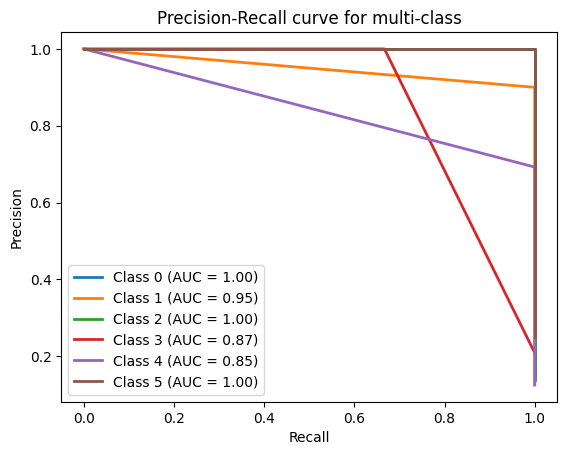

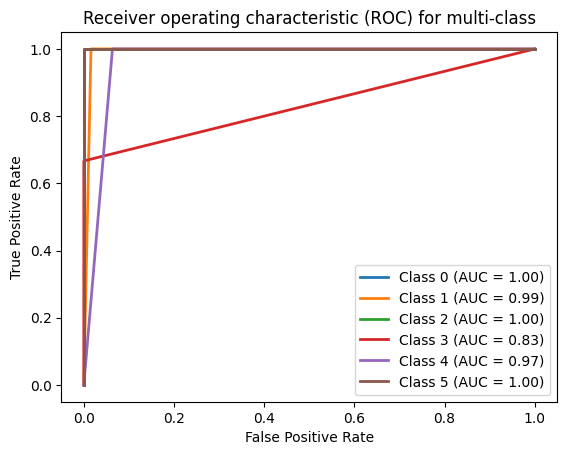

In [ ]:
#вывести метрики
print('Accuracy: ', grid_search.score(X_test, y_test))
metrics(y_test, y_pred)